🚀 Cybersecurity Anomaly Detection Lab
📊 Generating synthetic network traffic data...
✅ Data loaded successfully!
   Shape: (1050, 9)
   Features: ['flow_duration', 'total_fwd_packets', 'total_bwd_packets', 'flow_bytes_per_sec', 'flow_packets_per_sec', 'flow_iat_mean', 'fwd_packet_length_mean', 'bwd_packet_length_mean', 'label']
   Labels: {'Normal': 1000, 'Anomaly': 50}

📈 Dataset Overview:
   Samples: 1050
   Features: 8
   Has Labels: True

🔧 Preprocessing Data...
✅ Preprocessing complete!
   Feature range after scaling: [-3.05, 11.61]


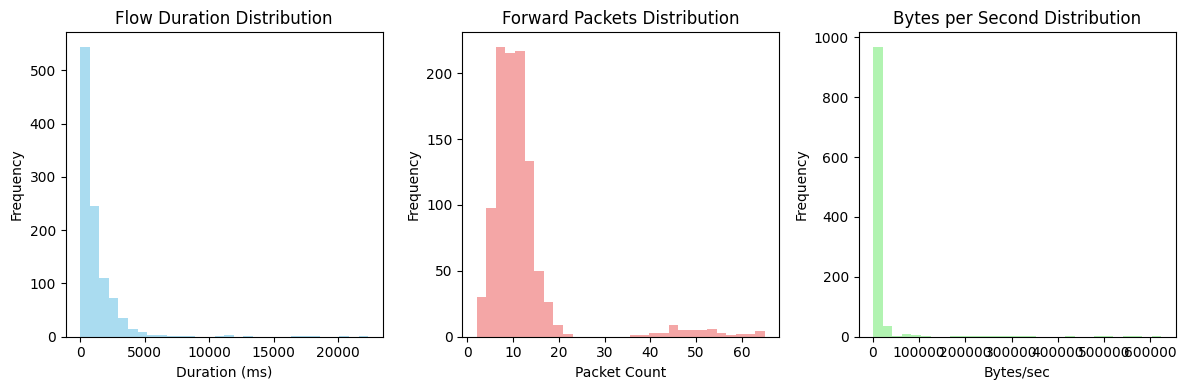


📊 Data exploration complete. Ready for anomaly detection!


In [1]:
# Student Lab: Unsupervised Anomaly Detection for Cybersecurity
# Class 10 - AI in Cybersecurity

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

#Set your file path here, tester file si on github AICS network attacks for anomaly detection tester.csv
file_path = '/your path here/AICS network attacks for anomaly detection tester.csv'

print("🚀 Cybersecurity Anomaly Detection Lab")
print("=" * 50)

# =====================================
# STEP 1: LOAD AND PREPARE DATA
# =====================================

def load_network_data(file_path=None):
    """
    Load network traffic data for anomaly detection
    """
    if file_path is None:
        # Generate synthetic network data for demonstration
        print("📊 Generating synthetic network traffic data...")
        np.random.seed(42)
        
        # Normal traffic patterns
        normal_samples = 1000
        normal_data = {
            'flow_duration': np.random.exponential(1000, normal_samples),
            'total_fwd_packets': np.random.poisson(10, normal_samples),
            'total_bwd_packets': np.random.poisson(8, normal_samples),
            'flow_bytes_per_sec': np.random.lognormal(8, 1, normal_samples),
            'flow_packets_per_sec': np.random.gamma(2, 2, normal_samples),
            'flow_iat_mean': np.random.exponential(50, normal_samples),
            'fwd_packet_length_mean': np.random.normal(800, 200, normal_samples),
            'bwd_packet_length_mean': np.random.normal(600, 150, normal_samples),
        }
        
        # Anomalous traffic patterns (attack data)
        anomaly_samples = 50
        anomaly_data = {
            'flow_duration': np.random.exponential(5000, anomaly_samples),  # Longer connections
            'total_fwd_packets': np.random.poisson(50, anomaly_samples),    # More packets
            'total_bwd_packets': np.random.poisson(5, anomaly_samples),     # Fewer responses
            'flow_bytes_per_sec': np.random.lognormal(12, 1, anomaly_samples),  # Higher throughput
            'flow_packets_per_sec': np.random.gamma(10, 2, anomaly_samples),    # Burst traffic
            'flow_iat_mean': np.random.exponential(10, anomaly_samples),    # Faster intervals
            'fwd_packet_length_mean': np.random.normal(1200, 300, anomaly_samples),  # Larger packets
            'bwd_packet_length_mean': np.random.normal(200, 50, anomaly_samples),    # Smaller responses
        }
        
        # Combine normal and anomalous data
        data = {}
        labels = []
        
        for feature in normal_data.keys():
            data[feature] = np.concatenate([normal_data[feature], anomaly_data[feature]])
        
        labels = ['Normal'] * normal_samples + ['Anomaly'] * anomaly_samples
        
        # Create DataFrame
        df = pd.DataFrame(data)
        df['label'] = labels
        
    else:
        # Load real data from file
        print(f"📂 Loading data from {file_path}...")
        df = pd.read_csv(file_path)
        
        # Check if we have labels
        if 'Label' in df.columns:
            df['label'] = df['Label']
            df = df.drop('Label', axis=1)
        elif 'label' not in df.columns:
            df['label'] = 'Unknown'
    
    print(f"✅ Data loaded successfully!")
    print(f"   Shape: {df.shape}")
    print(f"   Features: {df.columns.tolist()}")
    if 'label' in df.columns:
        print(f"   Labels: {df['label'].value_counts().to_dict()}")
    
    return df

# Load the data
data = load_network_data()

# Separate features and labels
if 'label' in data.columns:
    X = data.drop('label', axis=1)
    y = data['label']
    has_labels = True
else:
    X = data
    y = None
    has_labels = False

print(f"\n📈 Dataset Overview:")
print(f"   Samples: {len(X)}")
print(f"   Features: {len(X.columns)}")
print(f"   Has Labels: {has_labels}")

# =====================================
# STEP 2: DATA PREPROCESSING
# =====================================

print(f"\n🔧 Preprocessing Data...")

# Handle missing values
X = X.fillna(X.median())

# Remove any infinite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

# Scale the features (important for SVM and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(f"✅ Preprocessing complete!")
print(f"   Feature range after scaling: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# Quick data exploration
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X['flow_duration'], bins=30, alpha=0.7, color='skyblue')
plt.title('Flow Duration Distribution')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X['total_fwd_packets'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Forward Packets Distribution')
plt.xlabel('Packet Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X['flow_bytes_per_sec'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Bytes per Second Distribution')
plt.xlabel('Bytes/sec')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\n📊 Data exploration complete. Ready for anomaly detection!")


🌲 ISOLATION FOREST ANOMALY DETECTION
🔍 Running Isolation Forest with 5.0% expected anomalies...
✅ Isolation Forest Results:
   Normal samples: 997
   Anomalous samples: 53
   Anomaly rate: 5.0%

📝 STUDENT EXERCISE 1: Parameter Experimentation
Try different contamination values and observe the results:
🔍 Running Isolation Forest with 1.0% expected anomalies...
✅ Isolation Forest Results:
   Normal samples: 1039
   Anomalous samples: 11
   Anomaly rate: 1.0%
🔍 Running Isolation Forest with 5.0% expected anomalies...
✅ Isolation Forest Results:
   Normal samples: 997
   Anomalous samples: 53
   Anomaly rate: 5.0%
🔍 Running Isolation Forest with 10.0% expected anomalies...
✅ Isolation Forest Results:
   Normal samples: 945
   Anomalous samples: 105
   Anomaly rate: 10.0%
🔍 Running Isolation Forest with 15.0% expected anomalies...
✅ Isolation Forest Results:
   Normal samples: 892
   Anomalous samples: 158
   Anomaly rate: 15.0%


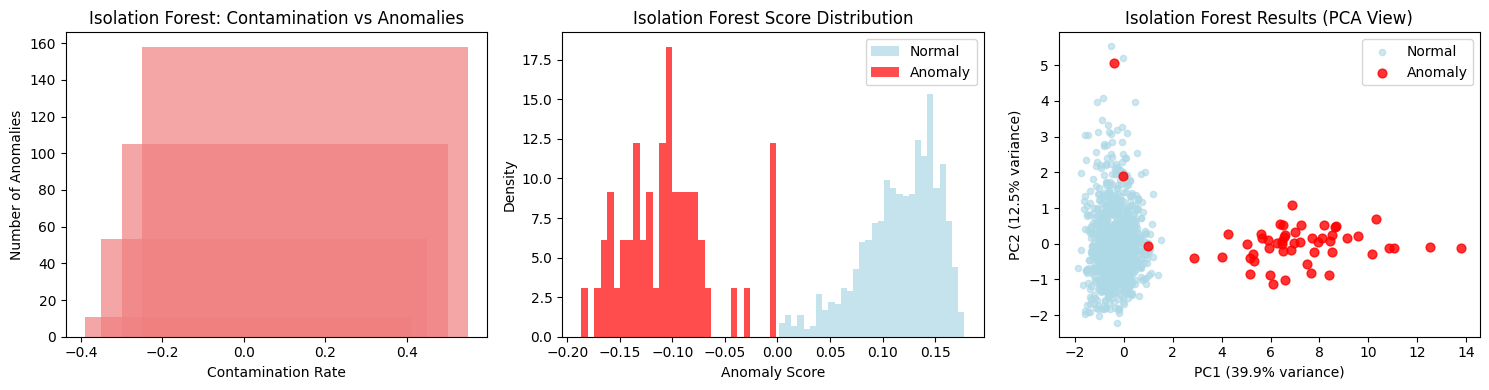


❓ REFLECTION QUESTIONS:
1. What happens to the number of detected anomalies as contamination increases?
2. Look at the score distribution - how do normal and anomalous scores differ?
3. In the PCA plot, do the detected anomalies appear to be outliers visually?
4. What contamination value would you choose for a real cybersecurity system? Why?

✏️  YOUR ANSWERS:
1. _________________________________________________
2. _________________________________________________
3. _________________________________________________
4. _________________________________________________


In [2]:
# =====================================
# ALGORITHM 1: ISOLATION FOREST
# =====================================

print("\n🌲 ISOLATION FOREST ANOMALY DETECTION")
print("=" * 50)

def run_isolation_forest(X_scaled, contamination=0.05):
    """
    Implement Isolation Forest for anomaly detection
    
    Parameters:
    - X_scaled: Scaled feature matrix
    - contamination: Expected proportion of outliers (0.05 = 5%)
    
    Returns:
    - anomaly_labels: -1 for anomalies, 1 for normal
    - anomaly_scores: Anomaly scores (more negative = more anomalous)
    """
    print(f"🔍 Running Isolation Forest with {contamination*100}% expected anomalies...")
    
    # Initialize Isolation Forest
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        n_estimators=100,
        max_features=1.0
    )
    
    # Fit the model and predict anomalies
    anomaly_labels = iso_forest.fit_predict(X_scaled)
    
    # Get anomaly scores (decision function)
    anomaly_scores = iso_forest.decision_function(X_scaled)
    
    # Count anomalies
    n_anomalies = np.sum(anomaly_labels == -1)
    n_normal = np.sum(anomaly_labels == 1)
    
    print(f"✅ Isolation Forest Results:")
    print(f"   Normal samples: {n_normal}")
    print(f"   Anomalous samples: {n_anomalies}")
    print(f"   Anomaly rate: {n_anomalies/len(anomaly_labels)*100:.1f}%")
    
    return anomaly_labels, anomaly_scores

# Run Isolation Forest
iso_labels, iso_scores = run_isolation_forest(X_scaled)

# =====================================
# STUDENT EXERCISE 1: EXPERIMENT WITH PARAMETERS
# =====================================

print(f"\n📝 STUDENT EXERCISE 1: Parameter Experimentation")
print("Try different contamination values and observe the results:")

# TODO: Students - try different contamination values
contamination_values = [0.01, 0.05, 0.1, 0.15]
iso_results = {}

for cont in contamination_values:
    labels, scores = run_isolation_forest(X_scaled, contamination=cont)
    iso_results[cont] = {
        'labels': labels,
        'scores': scores,
        'n_anomalies': np.sum(labels == -1)
    }

# Plot results
plt.figure(figsize=(15, 4))

# Plot 1: Anomaly counts for different contamination values
plt.subplot(1, 3, 1)
cont_vals = list(iso_results.keys())
anomaly_counts = [iso_results[c]['n_anomalies'] for c in cont_vals]
plt.bar(cont_vals, anomaly_counts, color='lightcoral', alpha=0.7)
plt.xlabel('Contamination Rate')
plt.ylabel('Number of Anomalies')
plt.title('Isolation Forest: Contamination vs Anomalies')

# Plot 2: Score distribution
plt.subplot(1, 3, 2)
scores = iso_results[0.05]['scores']
labels = iso_results[0.05]['labels']

normal_scores = scores[labels == 1]
anomaly_scores = scores[labels == -1]

plt.hist(normal_scores, bins=30, alpha=0.7, label='Normal', color='lightblue', density=True)
plt.hist(anomaly_scores, bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Isolation Forest Score Distribution')
plt.legend()

# Plot 3: PCA visualization
plt.subplot(1, 3, 3)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

normal_mask = iso_results[0.05]['labels'] == 1
anomaly_mask = iso_results[0.05]['labels'] == -1

plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
           c='lightblue', alpha=0.6, s=20, label='Normal')
plt.scatter(X_pca[anomaly_mask, 0], X_pca[anomaly_mask, 1], 
           c='red', alpha=0.8, s=40, label='Anomaly')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Isolation Forest Results (PCA View)')
plt.legend()

plt.tight_layout()
plt.show()

# =====================================
# STUDENT QUESTIONS FOR ISOLATION FOREST
# =====================================

print(f"\n❓ REFLECTION QUESTIONS:")
print("1. What happens to the number of detected anomalies as contamination increases?")
print("2. Look at the score distribution - how do normal and anomalous scores differ?")
print("3. In the PCA plot, do the detected anomalies appear to be outliers visually?")
print("4. What contamination value would you choose for a real cybersecurity system? Why?")

# ANSWER SPACE FOR STUDENTS
print(f"\n✏️  YOUR ANSWERS:")
print("1. _________________________________________________")
print("2. _________________________________________________")
print("3. _________________________________________________") 
print("4. _________________________________________________")


🎯 K-MEANS CLUSTERING ANOMALY DETECTION
🔍 Running K-Means with 8 clusters...
✅ K-Means Results:
   Number of clusters: 8
   Normal samples: 997
   Anomalous samples: 53
   Distance threshold: 2.691
   Max distance: 7.561
   Mean distance: 1.599

📝 STUDENT EXERCISE 2: Finding Optimal Number of Clusters
Let's use the elbow method to find the optimal number of clusters:
👀 Look at the elbow curve. What value of k would you choose? ________
🔍 Running K-Means with 3 clusters...
✅ K-Means Results:
   Number of clusters: 3
   Normal samples: 997
   Anomalous samples: 53
   Distance threshold: 3.312
   Max distance: 11.505
   Mean distance: 1.952
🔍 Running K-Means with 5 clusters...
✅ K-Means Results:
   Number of clusters: 5
   Normal samples: 997
   Anomalous samples: 53
   Distance threshold: 3.083
   Max distance: 8.099
   Mean distance: 1.781
🔍 Running K-Means with 8 clusters...
✅ K-Means Results:
   Number of clusters: 8
   Normal samples: 997
   Anomalous samples: 53
   Distance threshol

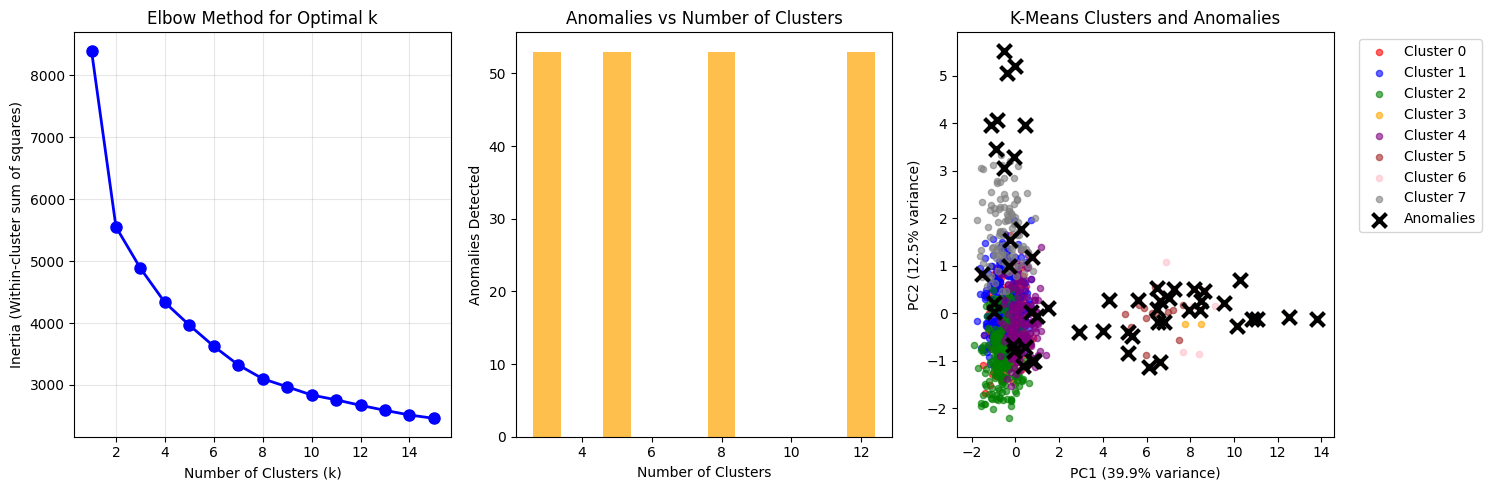


📊 DISTANCE ANALYSIS:


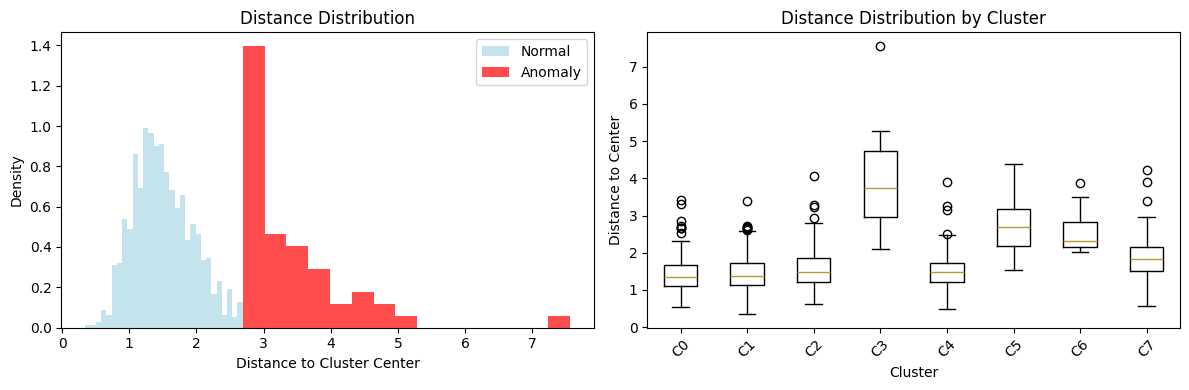


❓ REFLECTION QUESTIONS:
1. Based on the elbow curve, what is the optimal number of clusters?
2. Which clusters have the most anomalies? Why might this be?
3. How do the distance distributions differ between normal and anomalous points?
4. What are the advantages and disadvantages of using K-Means for anomaly detection?

✏️  YOUR ANSWERS:
1. _________________________________________________
2. _________________________________________________
3. _________________________________________________
4. _________________________________________________


In [3]:
# =====================================
# ALGORITHM 2: K-MEANS CLUSTERING
# =====================================

print("\n🎯 K-MEANS CLUSTERING ANOMALY DETECTION")
print("=" * 50)

def run_kmeans_anomaly_detection(X_scaled, n_clusters=8, contamination=0.05):
    """
    Implement K-Means clustering for anomaly detection
    
    Parameters:
    - X_scaled: Scaled feature matrix
    - n_clusters: Number of clusters to create
    - contamination: Expected proportion of outliers
    
    Returns:
    - cluster_labels: Cluster assignments for each point
    - distances: Distance from each point to its cluster center
    - anomaly_mask: Boolean mask for detected anomalies
    """
    print(f"🔍 Running K-Means with {n_clusters} clusters...")
    
    # Initialize K-Means
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=42,
        n_init=10,
        max_iter=300
    )
    
    # Fit the model and get cluster assignments
    cluster_labels = kmeans.fit_predict(X_scaled)
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate distance from each point to its cluster center
    distances = []
    for i, point in enumerate(X_scaled):
        cluster_id = cluster_labels[i]
        center = cluster_centers[cluster_id]
        distance = np.linalg.norm(point - center)
        distances.append(distance)
    
    distances = np.array(distances)
    
    # Determine anomaly threshold based on contamination
    threshold_percentile = (1 - contamination) * 100
    distance_threshold = np.percentile(distances, threshold_percentile)
    
    # Create anomaly mask (True for anomalies)
    anomaly_mask = distances > distance_threshold
    
    n_anomalies = np.sum(anomaly_mask)
    n_normal = np.sum(~anomaly_mask)
    
    print(f"✅ K-Means Results:")
    print(f"   Number of clusters: {n_clusters}")
    print(f"   Normal samples: {n_normal}")
    print(f"   Anomalous samples: {n_anomalies}")
    print(f"   Distance threshold: {distance_threshold:.3f}")
    print(f"   Max distance: {np.max(distances):.3f}")
    print(f"   Mean distance: {np.mean(distances):.3f}")
    
    return cluster_labels, distances, anomaly_mask

# Run K-Means with default parameters
kmeans_clusters, kmeans_distances, kmeans_anomalies = run_kmeans_anomaly_detection(X_scaled)

# =====================================
# STUDENT EXERCISE 2: OPTIMAL NUMBER OF CLUSTERS
# =====================================

print(f"\n📝 STUDENT EXERCISE 2: Finding Optimal Number of Clusters")
print("Let's use the elbow method to find the optimal number of clusters:")

def find_optimal_clusters(X_scaled, max_k=15):
    """
    Use elbow method to find optimal number of clusters
    """
    inertias = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    return k_values, inertias

# Find optimal clusters
k_values, inertias = find_optimal_clusters(X_scaled)

# Plot elbow curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# TODO: Students - identify the "elbow" point
print(f"👀 Look at the elbow curve. What value of k would you choose? ________")

# Compare different k values
plt.subplot(1, 3, 2)
k_test_values = [3, 5, 8, 12]
anomaly_counts = []

for k in k_test_values:
    _, _, anomalies = run_kmeans_anomaly_detection(X_scaled, n_clusters=k, contamination=0.05)
    anomaly_counts.append(np.sum(anomalies))

plt.bar(k_test_values, anomaly_counts, color='orange', alpha=0.7)
plt.xlabel('Number of Clusters')
plt.ylabel('Anomalies Detected')
plt.title('Anomalies vs Number of Clusters')

# Visualize clusters in PCA space
plt.subplot(1, 3, 3)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use k=8 for visualization
clusters_8, distances_8, anomalies_8 = run_kmeans_anomaly_detection(X_scaled, n_clusters=8)

# Create scatter plot with cluster colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i in range(8):
    cluster_mask = clusters_8 == i
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
               c=colors[i], alpha=0.6, s=20, label=f'Cluster {i}')

# Highlight anomalies
plt.scatter(X_pca[anomalies_8, 0], X_pca[anomalies_8, 1], 
           c='black', marker='x', s=100, linewidth=3, label='Anomalies')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('K-Means Clusters and Anomalies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# =====================================
# DISTANCE ANALYSIS
# =====================================

print(f"\n📊 DISTANCE ANALYSIS:")

# Plot distance distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
normal_distances = kmeans_distances[~kmeans_anomalies]
anomaly_distances = kmeans_distances[kmeans_anomalies]

plt.hist(normal_distances, bins=30, alpha=0.7, label='Normal', color='lightblue', density=True)
plt.hist(anomaly_distances, bins=15, alpha=0.7, label='Anomaly', color='red', density=True)
plt.xlabel('Distance to Cluster Center')
plt.ylabel('Density')
plt.title('Distance Distribution')
plt.legend()

plt.subplot(1, 2, 2)
# Box plot by cluster
cluster_distance_data = []
cluster_labels_for_plot = []

for i in range(8):
    cluster_mask = kmeans_clusters == i
    cluster_distances = kmeans_distances[cluster_mask]
    cluster_distance_data.append(cluster_distances)
    cluster_labels_for_plot.append(f'C{i}')

plt.boxplot(cluster_distance_data, labels=cluster_labels_for_plot)
plt.xlabel('Cluster')
plt.ylabel('Distance to Center')
plt.title('Distance Distribution by Cluster')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# =====================================
# STUDENT QUESTIONS FOR K-MEANS
# =====================================

print(f"\n❓ REFLECTION QUESTIONS:")
print("1. Based on the elbow curve, what is the optimal number of clusters?")
print("2. Which clusters have the most anomalies? Why might this be?")
print("3. How do the distance distributions differ between normal and anomalous points?")
print("4. What are the advantages and disadvantages of using K-Means for anomaly detection?")

print(f"\n✏️  YOUR ANSWERS:")
print("1. _________________________________________________")
print("2. _________________________________________________")
print("3. _________________________________________________") 
print("4. _________________________________________________")


🛡️ ONE-CLASS SVM ANOMALY DETECTION
🔍 Running One-Class SVM with nu=0.05, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 997
   Anomalous samples: 53
   Anomaly rate: 5.0%
   Decision score range: [-1.417, 2.026]

📝 STUDENT EXERCISE 3: Comparing Different Kernels
Let's test different kernels and see how they perform:

Testing linear kernel...
🔍 Running One-Class SVM with nu=0.05, kernel=linear...
✅ One-Class SVM Results:
   Normal samples: 944
   Anomalous samples: 106
   Anomaly rate: 10.1%
   Decision score range: [-0.000, 0.000]

Testing rbf kernel...
🔍 Running One-Class SVM with nu=0.05, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 997
   Anomalous samples: 53
   Anomaly rate: 5.0%
   Decision score range: [-1.417, 2.026]

Testing poly kernel...
🔍 Running One-Class SVM with nu=0.05, kernel=poly...
✅ One-Class SVM Results:
   Normal samples: 879
   Anomalous samples: 171
   Anomaly rate: 16.3%
   Decision score range: [-0.000, 1.169]

Testing sigmoid kernel..

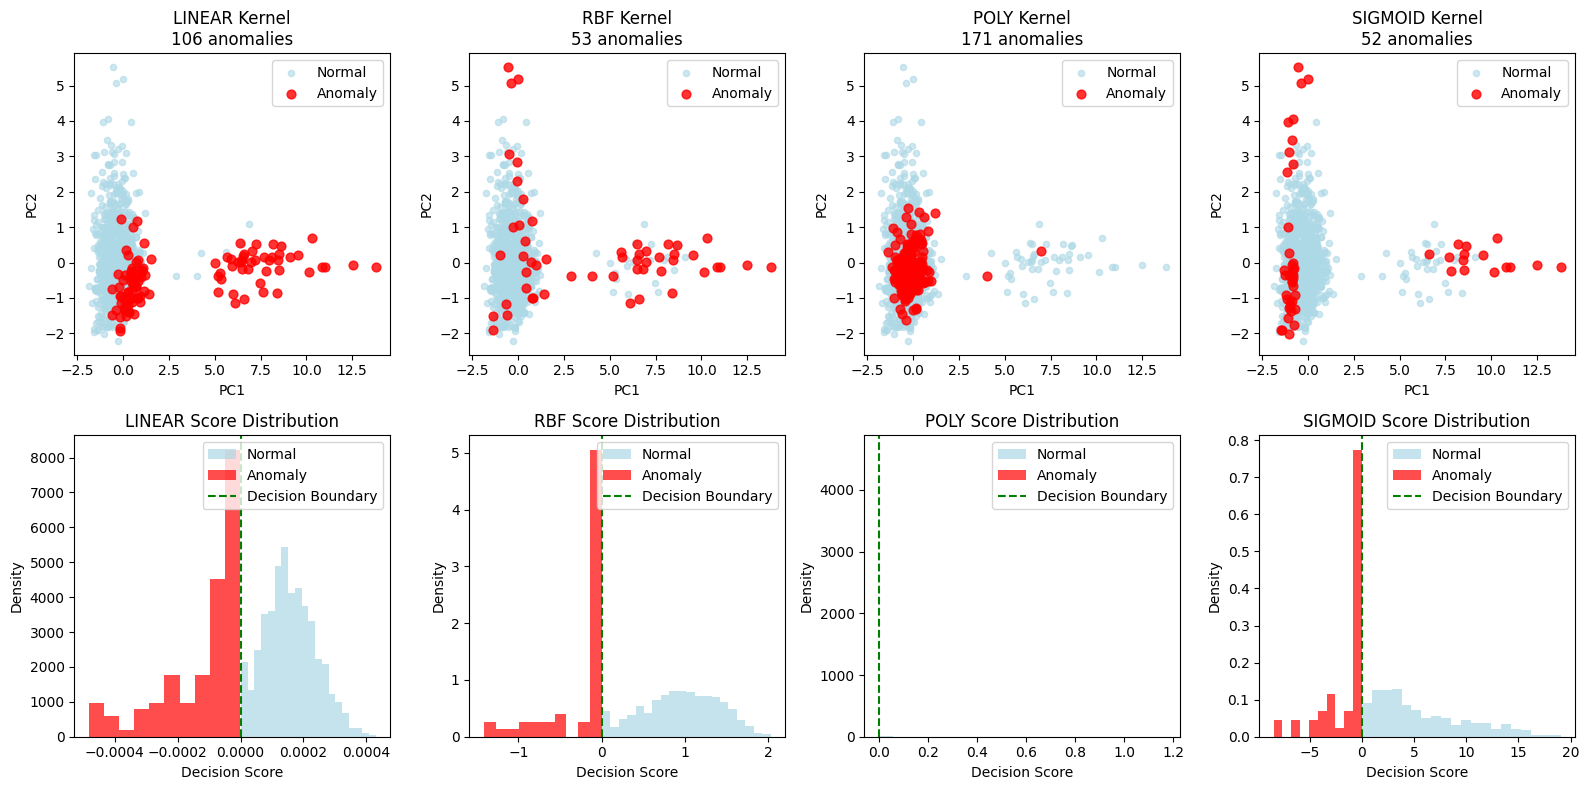


📊 PARAMETER SENSITIVITY ANALYSIS:
Testing different nu values (controls trade-off between false positives and false negatives):
🔍 Running One-Class SVM with nu=0.01, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 1010
   Anomalous samples: 40
   Anomaly rate: 3.8%
   Decision score range: [-0.000, 0.345]
🔍 Running One-Class SVM with nu=0.05, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 997
   Anomalous samples: 53
   Anomaly rate: 5.0%
   Decision score range: [-1.417, 2.026]
🔍 Running One-Class SVM with nu=0.1, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 947
   Anomalous samples: 103
   Anomaly rate: 9.8%
   Decision score range: [-7.079, 6.302]
🔍 Running One-Class SVM with nu=0.2, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 837
   Anomalous samples: 213
   Anomaly rate: 20.3%
   Decision score range: [-30.654, 20.366]
🔍 Running One-Class SVM with nu=0.3, kernel=rbf...
✅ One-Class SVM Results:
   Normal samples: 733
   Anomalous sam

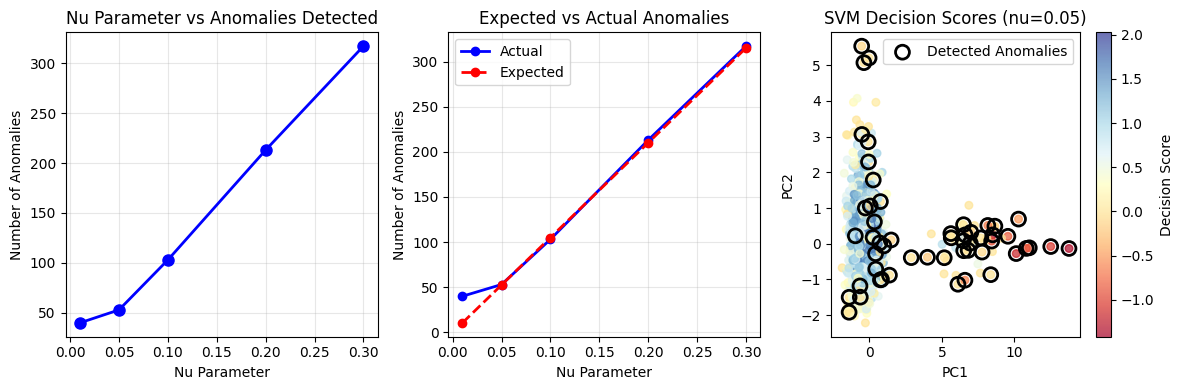


❓ REFLECTION QUESTIONS:
1. Which kernel performed best for this dataset? Why?
2. How does the nu parameter affect the number of detected anomalies?
3. What do positive vs negative decision scores represent?
4. When would you choose One-Class SVM over other anomaly detection methods?
5. What challenges might you face when tuning SVM parameters in practice?

✏️  YOUR ANSWERS:
1. _________________________________________________
2. _________________________________________________
3. _________________________________________________
4. _________________________________________________
5. _________________________________________________

📈 KERNEL PERFORMANCE SUMMARY:
   LINEAR   kernel: 106 anomalies (10.1%)
   RBF      kernel:  53 anomalies ( 5.0%)
   POLY     kernel: 171 anomalies (16.3%)
   SIGMOID  kernel:  52 anomalies ( 5.0%)


In [5]:
# =====================================
# ALGORITHM 3: ONE-CLASS SVM
# =====================================

print("\n🛡️ ONE-CLASS SVM ANOMALY DETECTION")
print("=" * 50)

def run_oneclass_svm(X_scaled, nu=0.05, kernel='rbf', gamma='scale'):
    """
    Implement One-Class SVM for anomaly detection
    
    Parameters:
    - X_scaled: Scaled feature matrix
    - nu: An upper bound on the fraction of training errors (0 < nu <= 1)
    - kernel: Kernel type ('linear', 'poly', 'rbf', 'sigmoid')
    - gamma: Kernel coefficient
    
    Returns:
    - svm_labels: -1 for anomalies, 1 for normal
    - decision_scores: Distance from the separating hyperplane
    """
    print(f"🔍 Running One-Class SVM with nu={nu}, kernel={kernel}...")
    
    # Initialize One-Class SVM
    svm = OneClassSVM(
        nu=nu,
        kernel=kernel,
        gamma=gamma,
        
    )
    
    # Fit the model and predict
    svm_labels = svm.fit_predict(X_scaled)
    
    # Get decision function scores
    decision_scores = svm.decision_function(X_scaled)
    
    # Count anomalies
    n_anomalies = np.sum(svm_labels == -1)
    n_normal = np.sum(svm_labels == 1)
    
    print(f"✅ One-Class SVM Results:")
    print(f"   Normal samples: {n_normal}")
    print(f"   Anomalous samples: {n_anomalies}")
    print(f"   Anomaly rate: {n_anomalies/len(svm_labels)*100:.1f}%")
    print(f"   Decision score range: [{np.min(decision_scores):.3f}, {np.max(decision_scores):.3f}]")
    
    return svm_labels, decision_scores

# Run One-Class SVM with default parameters
svm_labels, svm_scores = run_oneclass_svm(X_scaled)

# =====================================
# STUDENT EXERCISE 3: KERNEL COMPARISON
# =====================================

print(f"\n📝 STUDENT EXERCISE 3: Comparing Different Kernels")
print("Let's test different kernels and see how they perform:")

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_results = {}

plt.figure(figsize=(16, 8))

for i, kernel in enumerate(kernels):
    print(f"\nTesting {kernel} kernel...")
    
    try:
        labels, scores = run_oneclass_svm(X_scaled, nu=0.05, kernel=kernel)
        svm_results[kernel] = {
            'labels': labels,
            'scores': scores,
            'n_anomalies': np.sum(labels == -1)
        }
        
        # Plot results for each kernel
        plt.subplot(2, 4, i+1)
        
        # PCA visualization
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        normal_mask = labels == 1
        anomaly_mask = labels == -1
        
        plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
                   c='lightblue', alpha=0.6, s=20, label='Normal')
        plt.scatter(X_pca[anomaly_mask, 0], X_pca[anomaly_mask, 1], 
                   c='red', alpha=0.8, s=40, label='Anomaly')
        plt.title(f'{kernel.upper()} Kernel\n{np.sum(anomaly_mask)} anomalies')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        
        # Plot decision scores
        plt.subplot(2, 4, i+5)
        normal_scores = scores[normal_mask]
        anomaly_scores = scores[anomaly_mask]
        
        plt.hist(normal_scores, bins=20, alpha=0.7, label='Normal', color='lightblue', density=True)
        if len(anomaly_scores) > 0:
            plt.hist(anomaly_scores, bins=10, alpha=0.7, label='Anomaly', color='red', density=True)
        plt.axvline(x=0, color='green', linestyle='--', label='Decision Boundary')
        plt.xlabel('Decision Score')
        plt.ylabel('Density')
        plt.title(f'{kernel.upper()} Score Distribution')
        plt.legend()
        
    except Exception as e:
        print(f"Error with {kernel} kernel: {e}")
        svm_results[kernel] = None

plt.tight_layout()
plt.show()

# =====================================
# PARAMETER SENSITIVITY ANALYSIS
# =====================================

print(f"\n📊 PARAMETER SENSITIVITY ANALYSIS:")
print("Testing different nu values (controls trade-off between false positives and false negatives):")

nu_values = [0.01, 0.05, 0.1, 0.2, 0.3]
nu_results = {}

for nu in nu_values:
    labels, scores = run_oneclass_svm(X_scaled, nu=nu, kernel='rbf')
    nu_results[nu] = {
        'labels': labels,
        'scores': scores,
        'n_anomalies': np.sum(labels == -1)
    }

# Plot nu sensitivity
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
nu_vals = list(nu_results.keys())
anomaly_counts = [nu_results[nu]['n_anomalies'] for nu in nu_vals]
plt.plot(nu_vals, anomaly_counts, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nu Parameter')
plt.ylabel('Number of Anomalies')
plt.title('Nu Parameter vs Anomalies Detected')
plt.grid(True, alpha=0.3)

# Compare with expected nu
plt.subplot(1, 3, 2)
expected_anomalies = [nu * len(X_scaled) for nu in nu_vals]
plt.plot(nu_vals, anomaly_counts, 'bo-', label='Actual', linewidth=2)
plt.plot(nu_vals, expected_anomalies, 'ro--', label='Expected', linewidth=2)
plt.xlabel('Nu Parameter')
plt.ylabel('Number of Anomalies')
plt.title('Expected vs Actual Anomalies')
plt.legend()
plt.grid(True, alpha=0.3)

# Decision boundary visualization for nu=0.05
plt.subplot(1, 3, 3)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use nu=0.05 results
labels_005 = nu_results[0.05]['labels']
scores_005 = nu_results[0.05]['scores']

# Create a colormap based on decision scores
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scores_005, 
                     cmap='RdYlBu', alpha=0.7, s=30)
plt.colorbar(scatter, label='Decision Score')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM Decision Scores (nu=0.05)')

# Mark the detected anomalies
anomaly_mask = labels_005 == -1
plt.scatter(X_pca[anomaly_mask, 0], X_pca[anomaly_mask, 1], 
           facecolors='none', edgecolors='black', s=100, linewidth=2, label='Detected Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

# =====================================
# STUDENT QUESTIONS FOR ONE-CLASS SVM
# =====================================

print(f"\n❓ REFLECTION QUESTIONS:")
print("1. Which kernel performed best for this dataset? Why?")
print("2. How does the nu parameter affect the number of detected anomalies?")
print("3. What do positive vs negative decision scores represent?")
print("4. When would you choose One-Class SVM over other anomaly detection methods?")
print("5. What challenges might you face when tuning SVM parameters in practice?")

print(f"\n✏️  YOUR ANSWERS:")
print("1. _________________________________________________")
print("2. _________________________________________________")
print("3. _________________________________________________") 
print("4. _________________________________________________")
print("5. _________________________________________________")

# Performance summary
print(f"\n📈 KERNEL PERFORMANCE SUMMARY:")
for kernel, result in svm_results.items():
    if result is not None:
        n_anomalies = result['n_anomalies']
        percentage = (n_anomalies / len(X_scaled)) * 100
        print(f"   {kernel.upper():8} kernel: {n_anomalies:3d} anomalies ({percentage:4.1f}%)")


🔄 COMPARING ALL THREE ALGORITHMS
📊 ALGORITHM COMPARISON SUMMARY:
   Isolation Forest: 53 anomalies
   K-Means:          53 anomalies
   One-Class SVM:    53 anomalies
   High Confidence:  48 anomalies (≥2 methods agree)
   Unanimous:        24 anomalies (all 3 methods agree)


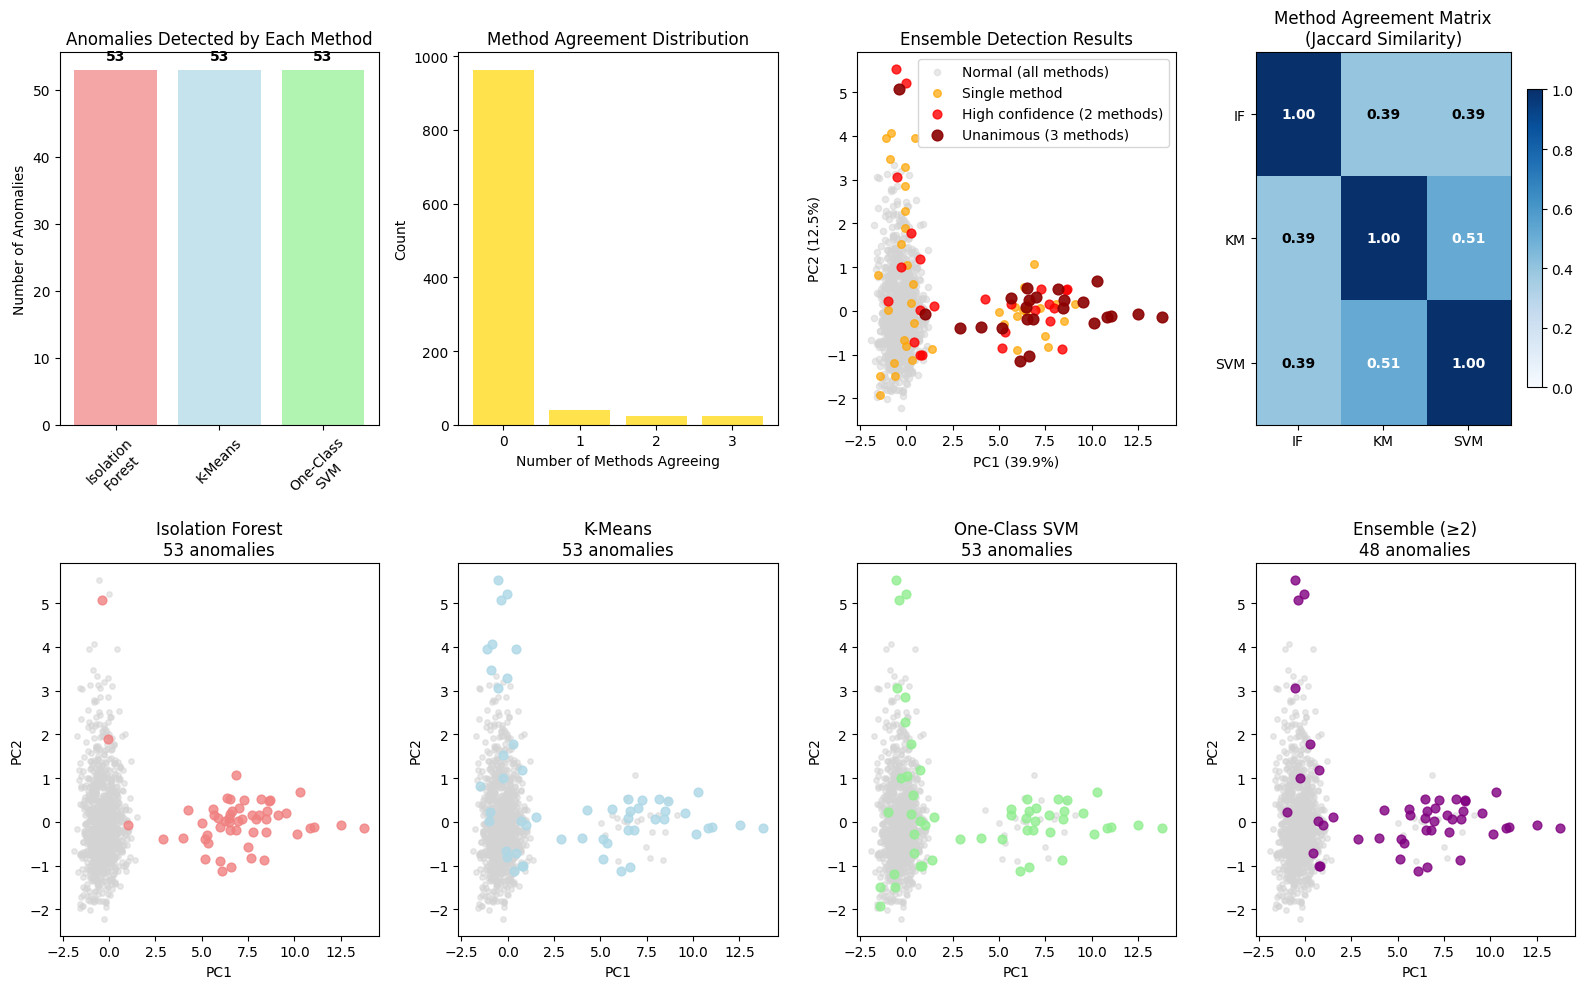


🎯 PERFORMANCE EVALUATION WITH GROUND TRUTH:

Isolation Forest:
   Accuracy:  0.997
   Precision: 0.943
   Recall:    1.000
   F1-Score:  0.971

K-Means:
   Accuracy:  0.955
   Precision: 0.528
   Recall:    0.560
   F1-Score:  0.544

One-Class SVM:
   Accuracy:  0.955
   Precision: 0.528
   Recall:    0.560
   F1-Score:  0.544

Ensemble (≥2):
   Accuracy:  0.971
   Precision: 0.708
   Recall:    0.680
   F1-Score:  0.694


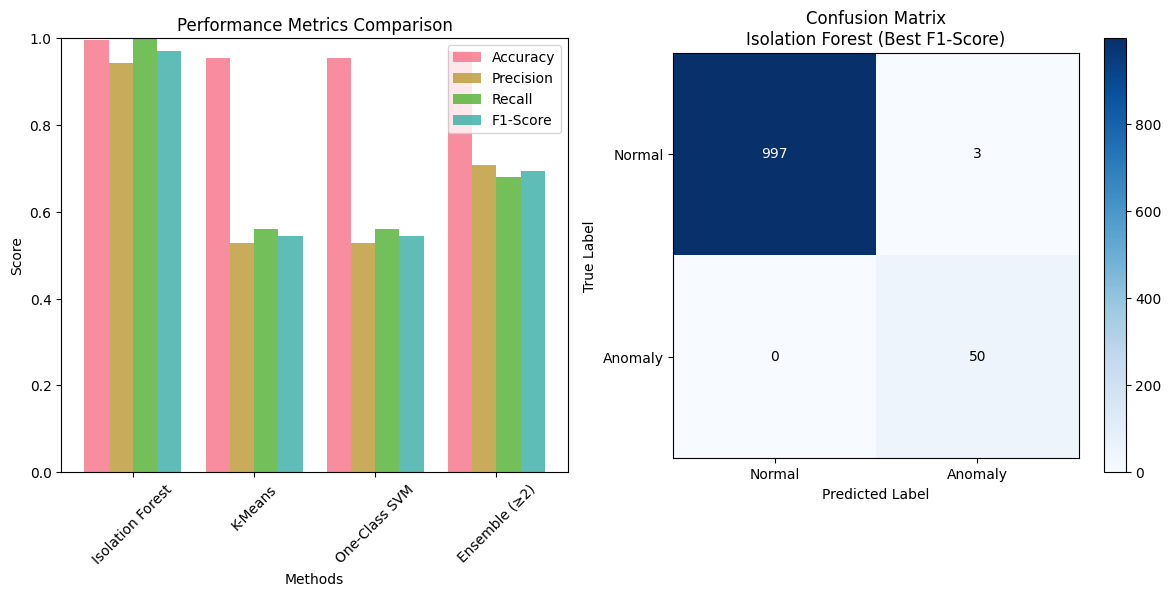


📋 FINAL ANALYSIS:
Dataset Summary:
   Total samples: 1050
   Isolation Forest detected: 53 (5.0%)
   K-Means detected: 53 (5.0%)
   One-Class SVM detected: 53 (5.0%)
   High confidence (≥2 methods): 48 (4.6%)
   Unanimous (all 3 methods): 24 (2.3%)

Pairwise Agreement:
   Isolation Forest ↔ K-Means: 30 samples
   Isolation Forest ↔ SVM: 30 samples
   K-Means ↔ SVM: 36 samples

🎯 CYBERSECURITY RECOMMENDATIONS:
1. Use ensemble methods for higher confidence in anomaly detection
2. Prioritize investigating unanimous detections first
3. Consider domain expertise when single methods disagree
4. Isolation Forest: Good for high-dimensional network features
5. K-Means: Good when attacks form distinct clusters
6. One-Class SVM: Good for complex decision boundaries
7. Adjust contamination parameters based on your threat model
8. Validate results with network security experts


In [6]:
# =====================================
# ALGORITHM COMPARISON AND EVALUATION
# =====================================

print("\n🔄 COMPARING ALL THREE ALGORITHMS")
print("=" * 60)

# =====================================
# ENSEMBLE DETECTION RESULTS
# =====================================

def compare_algorithms(iso_labels, kmeans_anomalies, svm_labels):
    """
    Compare results from all three algorithms
    """
    # Convert to consistent format (True = anomaly, False = normal)
    iso_anomalies = (iso_labels == -1)
    svm_anomalies = (svm_labels == -1)
    
    # Create comparison dataframe
    results_df = pd.DataFrame({
        'Isolation_Forest': iso_anomalies,
        'K_Means': kmeans_anomalies,
        'One_Class_SVM': svm_anomalies
    })
    
    # Calculate agreement
    results_df['Agreement_Count'] = results_df.sum(axis=1)
    results_df['High_Confidence'] = results_df['Agreement_Count'] >= 2
    results_df['Unanimous'] = results_df['Agreement_Count'] == 3
    
    return results_df

# Compare all algorithms
comparison_results = compare_algorithms(iso_labels, kmeans_anomalies, svm_labels)

# Print summary statistics
print(f"📊 ALGORITHM COMPARISON SUMMARY:")
print(f"   Isolation Forest: {np.sum(comparison_results['Isolation_Forest'])} anomalies")
print(f"   K-Means:          {np.sum(comparison_results['K_Means'])} anomalies")
print(f"   One-Class SVM:    {np.sum(comparison_results['One_Class_SVM'])} anomalies")
print(f"   High Confidence:  {np.sum(comparison_results['High_Confidence'])} anomalies (≥2 methods agree)")
print(f"   Unanimous:        {np.sum(comparison_results['Unanimous'])} anomalies (all 3 methods agree)")

# =====================================
# VISUALIZATION: METHOD COMPARISON
# =====================================

plt.figure(figsize=(16, 10))

# 1. Venn diagram-style comparison
plt.subplot(2, 4, 1)
method_counts = [
    np.sum(comparison_results['Isolation_Forest']),
    np.sum(comparison_results['K_Means']),
    np.sum(comparison_results['One_Class_SVM'])
]
methods = ['Isolation\nForest', 'K-Means', 'One-Class\nSVM']
colors = ['lightcoral', 'lightblue', 'lightgreen']

bars = plt.bar(methods, method_counts, color=colors, alpha=0.7)
plt.ylabel('Number of Anomalies')
plt.title('Anomalies Detected by Each Method')
plt.xticks(rotation=45)

# Add count labels on bars
for bar, count in zip(bars, method_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{count}', ha='center', va='bottom', fontweight='bold')

# 2. Agreement analysis
plt.subplot(2, 4, 2)
agreement_counts = comparison_results['Agreement_Count'].value_counts().sort_index()
plt.bar(agreement_counts.index, agreement_counts.values, color='gold', alpha=0.7)
plt.xlabel('Number of Methods Agreeing')
plt.ylabel('Count')
plt.title('Method Agreement Distribution')
plt.xticks([0, 1, 2, 3])

# 3. PCA view with all methods
plt.subplot(2, 4, 3)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot normal points
normal_mask = comparison_results['Agreement_Count'] == 0
plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
           c='lightgray', alpha=0.5, s=20, label='Normal (all methods)')

# Plot anomalies by confidence level
high_conf_mask = comparison_results['High_Confidence'] & ~comparison_results['Unanimous']
unanimous_mask = comparison_results['Unanimous']
single_method_mask = (comparison_results['Agreement_Count'] == 1)

plt.scatter(X_pca[single_method_mask, 0], X_pca[single_method_mask, 1], 
           c='orange', alpha=0.7, s=30, label='Single method')
plt.scatter(X_pca[high_conf_mask, 0], X_pca[high_conf_mask, 1], 
           c='red', alpha=0.8, s=40, label='High confidence (2 methods)')
plt.scatter(X_pca[unanimous_mask, 0], X_pca[unanimous_mask, 1], 
           c='darkred', alpha=0.9, s=60, label='Unanimous (3 methods)')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Ensemble Detection Results')
plt.legend()

# 4. Method overlap analysis
plt.subplot(2, 4, 4)
methods = ['IF', 'KM', 'SVM']
overlap_matrix = np.zeros((3, 3))

for i, method1 in enumerate(['Isolation_Forest', 'K_Means', 'One_Class_SVM']):
    for j, method2 in enumerate(['Isolation_Forest', 'K_Means', 'One_Class_SVM']):
        if i == j:
            overlap_matrix[i, j] = 1.0
        else:
            # Calculate Jaccard similarity
            set1 = set(np.where(comparison_results[method1])[0])
            set2 = set(np.where(comparison_results[method2])[0])
            if len(set1) > 0 and len(set2) > 0:
                jaccard = len(set1.intersection(set2)) / len(set1.union(set2))
                overlap_matrix[i, j] = jaccard

im = plt.imshow(overlap_matrix, cmap='Blues', aspect='auto', vmin=0, vmax=1)
plt.title('Method Agreement Matrix\n(Jaccard Similarity)')
plt.xticks(range(3), methods)
plt.yticks(range(3), methods)

# Add text annotations
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{overlap_matrix[i, j]:.2f}', 
                ha='center', va='center', fontweight='bold',
                color='white' if overlap_matrix[i, j] > 0.5 else 'black')

plt.colorbar(im, shrink=0.8)

# 5-8. Individual method visualizations
methods_data = [
    ('Isolation Forest', comparison_results['Isolation_Forest'], 'lightcoral'),
    ('K-Means', comparison_results['K_Means'], 'lightblue'),
    ('One-Class SVM', comparison_results['One_Class_SVM'], 'lightgreen'),
    ('Ensemble (≥2)', comparison_results['High_Confidence'], 'purple')
]

for i, (method_name, anomaly_mask, color) in enumerate(methods_data):
    plt.subplot(2, 4, 5 + i)
    
    normal_points = X_pca[~anomaly_mask]
    anomaly_points = X_pca[anomaly_mask]
    
    plt.scatter(normal_points[:, 0], normal_points[:, 1], 
               c='lightgray', alpha=0.5, s=15)
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], 
               c=color, alpha=0.8, s=40)
    
    plt.title(f'{method_name}\n{np.sum(anomaly_mask)} anomalies')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# =====================================
# PERFORMANCE EVALUATION (IF LABELS AVAILABLE)
# =====================================

if has_labels and y is not None:
    print(f"\n🎯 PERFORMANCE EVALUATION WITH GROUND TRUTH:")
    
    # Convert ground truth to binary (True = anomaly)
    y_true = (y == 'Anomaly')
    
    methods_to_evaluate = {
        'Isolation Forest': comparison_results['Isolation_Forest'],
        'K-Means': comparison_results['K_Means'],
        'One-Class SVM': comparison_results['One_Class_SVM'],
        'Ensemble (≥2)': comparison_results['High_Confidence']
    }
    
    evaluation_results = {}
    
    for method_name, y_pred in methods_to_evaluate.items():
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        evaluation_results[method_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
        
        print(f"\n{method_name}:")
        print(f"   Accuracy:  {accuracy:.3f}")
        print(f"   Precision: {precision:.3f}")
        print(f"   Recall:    {recall:.3f}")
        print(f"   F1-Score:  {f1:.3f}")
    
    # Plot performance metrics
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    methods = list(evaluation_results.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    x = np.arange(len(methods))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        values = [evaluation_results[method][metric] for method in methods]
        plt.bar(x + i * width, values, width, label=metric, alpha=0.8)
    
    plt.xlabel('Methods')
    plt.ylabel('Score')
    plt.title('Performance Metrics Comparison')
    plt.xticks(x + width * 1.5, methods, rotation=45)
    plt.legend()
    plt.ylim(0, 1)
    
    # Confusion matrices
    plt.subplot(1, 2, 2)
    from sklearn.metrics import confusion_matrix
    
    # Show confusion matrix for best performing method
    best_method = max(evaluation_results.keys(), 
                     key=lambda x: evaluation_results[x]['F1-Score'])
    best_predictions = methods_to_evaluate[best_method]
    
    cm = confusion_matrix(y_true, best_predictions)
    
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix\n{best_method} (Best F1-Score)')
    plt.colorbar()
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Normal', 'Anomaly'])
    plt.yticks(tick_marks, ['Normal', 'Anomaly'])
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"\n⚠️  No ground truth labels available for performance evaluation.")
    print(f"   Focus on ensemble methods and domain expertise for validation.")

# =====================================
# FINAL ANALYSIS AND RECOMMENDATIONS
# =====================================

print(f"\n📋 FINAL ANALYSIS:")
print("=" * 50)

# Calculate some summary statistics
total_samples = len(comparison_results)
iso_anomalies = np.sum(comparison_results['Isolation_Forest'])
kmeans_anomalies = np.sum(comparison_results['K_Means'])
svm_anomalies = np.sum(comparison_results['One_Class_SVM'])
high_conf_anomalies = np.sum(comparison_results['High_Confidence'])
unanimous_anomalies = np.sum(comparison_results['Unanimous'])

print(f"Dataset Summary:")
print(f"   Total samples: {total_samples}")
print(f"   Isolation Forest detected: {iso_anomalies} ({iso_anomalies/total_samples*100:.1f}%)")
print(f"   K-Means detected: {kmeans_anomalies} ({kmeans_anomalies/total_samples*100:.1f}%)")
print(f"   One-Class SVM detected: {svm_anomalies} ({svm_anomalies/total_samples*100:.1f}%)")
print(f"   High confidence (≥2 methods): {high_conf_anomalies} ({high_conf_anomalies/total_samples*100:.1f}%)")
print(f"   Unanimous (all 3 methods): {unanimous_anomalies} ({unanimous_anomalies/total_samples*100:.1f}%)")

# Method agreement analysis
iso_kmeans_agreement = np.sum(comparison_results['Isolation_Forest'] & comparison_results['K_Means'])
iso_svm_agreement = np.sum(comparison_results['Isolation_Forest'] & comparison_results['One_Class_SVM'])
kmeans_svm_agreement = np.sum(comparison_results['K_Means'] & comparison_results['One_Class_SVM'])

print(f"\nPairwise Agreement:")
print(f"   Isolation Forest ↔ K-Means: {iso_kmeans_agreement} samples")
print(f"   Isolation Forest ↔ SVM: {iso_svm_agreement} samples")
print(f"   K-Means ↔ SVM: {kmeans_svm_agreement} samples")

print(f"\n🎯 CYBERSECURITY RECOMMENDATIONS:")
print("1. Use ensemble methods for higher confidence in anomaly detection")
print("2. Prioritize investigating unanimous detections first")
print("3. Consider domain expertise when single methods disagree")
print("4. Isolation Forest: Good for high-dimensional network features")
print("5. K-Means: Good when attacks form distinct clusters")
print("6. One-Class SVM: Good for complex decision boundaries")
print("7. Adjust contamination parameters based on your threat model")
print("8. Validate results with network security experts")

In [ ]:
# =====================================
# LAB ASSIGNMENT TASKS
# Assignment #05: Model Training & Evaluation
# Due: August 21, 11:59 PM ET
# Points: 10
# =====================================

print("\n📝 ASSIGNMENT #05: MODEL TRAINING & EVALUATION")
print("=" * 60)
print("Due: August 21, 11:59 PM ET | Points: 10")

# =====================================
# TASK 1: DATA IMPORT AND CLEANING (2 points)
# =====================================

print(f"\n🔧 TASK 1: DATA IMPORT AND CLEANING (2 points)")
print("-" * 50)

# TODO: Students complete this section
print("INSTRUCTIONS:")
print("1. Load a cybersecurity dataset (use provided data or find your own)")
print("2. Perform data cleaning (handle missing values, infinite values)")
print("3. Scale/normalize the features appropriately")
print("4. Create visualizations showing data distribution")
print("5. Document any data quality issues you discover")

print("\n✏️  STUDENT COMPLETION CHECKLIST:")
print("□ Dataset loaded successfully")
print("□ Missing values handled")
print("□ Features scaled/normalized") 
print("□ Data distribution visualized")
print("□ Data quality issues documented")

# Example code structure for students:
"""
# YOUR CODE HERE:
# def load_and_clean_data(file_path):
#     # Load data
#     data = pd.read_csv(file_path)
#     
#     # Clean data
#     # ... your cleaning code ...
#     
#     # Scale features
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(features)
#     
#     # Visualize
#     # ... your visualization code ...
#     
#     return cleaned_data, scaled_data

# data, scaled_data = load_and_clean_data('your_dataset.csv')
"""

# =====================================
# TASK 2: ALGORITHM IMPLEMENTATION (3 points)
# =====================================

print(f"\n🤖 TASK 2: ALGORITHM IMPLEMENTATION (3 points)")
print("-" * 50)

print("INSTRUCTIONS:")
print("1. Implement all three algorithms: Isolation Forest, K-Means, One-Class SVM")
print("2. Experiment with different parameters for each algorithm")
print("3. Document the parameter choices and justify your decisions")
print("4. Handle any errors or edge cases gracefully")

print("\n✏️  STUDENT COMPLETION CHECKLIST:")
print("□ Isolation Forest implemented and tuned")
print("□ K-Means implemented and tuned")
print("□ One-Class SVM implemented and tuned")
print("□ Parameter choices documented and justified")
print("□ Error handling implemented")

# Parameter tuning template:
"""
# YOUR PARAMETER TUNING CODE HERE:

# Isolation Forest parameters to test:
contamination_values = [0.01, 0.05, 0.1, 0.15]

# K-Means parameters to test:
k_values = [3, 5, 8, 10, 15]

# SVM parameters to test:
nu_values = [0.01, 0.05, 0.1, 0.2]
kernels = ['linear', 'rbf', 'poly']

# Document your findings:
# Best Isolation Forest contamination: ___________
# Best K-Means k value: ___________  
# Best SVM nu value: ___________
# Best SVM kernel: ___________
# Justification: ___________
"""

# =====================================
# TASK 3: PERFORMANCE EVALUATION (2 points)
# =====================================

print(f"\n📊 TASK 3: PERFORMANCE EVALUATION (2 points)")
print("-" * 50)

print("INSTRUCTIONS:")
print("1. Compare the performance of all three algorithms")
print("2. If you have ground truth labels, calculate accuracy, precision, recall, F1-score")
print("3. If no labels, use ensemble methods and confidence scoring")
print("4. Create confusion matrices (if labels available)")
print("5. Analyze which algorithm works best for your dataset and explain why")

print("\n✏️  STUDENT COMPLETION CHECKLIST:")
print("□ Performance metrics calculated")
print("□ Algorithm comparison completed")
print("□ Confusion matrices created (if applicable)")
print("□ Best algorithm identified and justified")
print("□ Ensemble analysis performed")

# Evaluation template:
"""
# YOUR EVALUATION CODE HERE:

def evaluate_algorithm_performance(y_true, y_pred, algorithm_name):
    '''
    Calculate and display performance metrics
    '''
    if y_true is not None:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        print(f"{algorithm_name} Performance:")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  Precision: {precision:.3f}")
        print(f"  Recall: {recall:.3f}")
        print(f"  F1-Score: {f1:.3f}")
        
        return accuracy, precision, recall, f1
    else:
        print(f"{algorithm_name}: No ground truth available")
        return None

# YOUR ANALYSIS:
# Best performing algorithm: ___________
# Justification: ___________
# Ensemble vs individual performance: ___________
"""

# =====================================
# TASK 4: VISUALIZATION AND ANALYSIS (2 points)
# =====================================

print(f"\n📈 TASK 4: VISUALIZATION AND ANALYSIS (2 points)")
print("-" * 50)

print("INSTRUCTIONS:")
print("1. Create comprehensive visualizations using seaborn/matplotlib")
print("2. Include PCA plots showing detected anomalies")
print("3. Show algorithm comparison plots")
print("4. Create distribution plots for normal vs anomalous samples")
print("5. Include ensemble analysis visualizations")

print("\n✏️  STUDENT COMPLETION CHECKLIST:")
print("□ PCA anomaly detection plots created")
print("□ Algorithm comparison visualizations")
print("□ Distribution analysis plots")
print("□ Ensemble analysis visualizations")
print("□ All plots properly labeled and titled")

# Visualization requirements:
"""
# REQUIRED VISUALIZATIONS:

1. Data Distribution Plots:
   - Feature histograms
   - Correlation heatmap
   - Box plots by class (if labeled)

2. Algorithm Results:
   - PCA scatter plots for each algorithm
   - ROC curves (if labeled data)
   - Performance comparison bar charts

3. Ensemble Analysis:
   - Method agreement matrix
   - Confidence score distributions
   - Combined detection results

4. Parameter Analysis:
   - Elbow curves for K-means
   - Parameter sensitivity plots
   - Score distributions

# YOUR VISUALIZATION CODE HERE:
"""

# =====================================
# TASK 5: WRITTEN ANALYSIS (1 point)
# =====================================

print(f"\n📝 TASK 5: WRITTEN ANALYSIS (1 point)")
print("-" * 50)

print("INSTRUCTIONS:")
print("1. Write a summary analysis of your findings (300-500 words)")
print("2. Compare the strengths and weaknesses of each algorithm")
print("3. Discuss which algorithm would be best for cybersecurity applications")
print("4. Provide recommendations for parameter tuning")
print("5. Suggest improvements or next steps")

print("\n✏️  WRITING PROMPTS:")
print("1. Which algorithm detected the most anomalies? Why might this be?")
print("2. How did parameter choices affect performance?")
print("3. What are the trade-offs between false positives and false negatives?")
print("4. How would you deploy these algorithms in a real cybersecurity system?")
print("5. What additional data or features might improve detection performance?")

# =====================================
# SUBMISSION REQUIREMENTS
# =====================================

print(f"\n📤 SUBMISSION REQUIREMENTS:")
print("-" * 50)
print("Submit a single Jupyter notebook (.ipynb) that includes:")
print("✓ All code cells executed with outputs visible")
print("✓ Clear markdown explanations for each section")
print("✓ All visualizations properly displayed")
print("✓ Written analysis addressing all prompts")
print("✓ Code comments explaining your implementation choices")
print("✓ Results summary and conclusions")

print(f"\nFILE NAMING: lastname_firstname_assignment05.ipynb")
print(f"SUBMISSION: Upload to Canvas by August 21, 11:59 PM ET")

# =====================================
# GRADING RUBRIC
# =====================================

print(f"\n📊 GRADING RUBRIC (10 points total):")
print("-" * 50)
grading_rubric = {
    "Data Import & Cleaning": "2 points",
    "Algorithm Implementation": "3 points", 
    "Performance Evaluation": "2 points",
    "Visualization & Analysis": "2 points",
    "Written Analysis": "1 point"
}

for criterion, points in grading_rubric.items():
    print(f"• {criterion}: {points}")

print(f"\nGRADING CRITERIA:")
print("• Excellent (90-100%): All requirements met, high-quality analysis, insightful conclusions")
print("• Good (80-89%): Most requirements met, good analysis, minor issues")
print("• Satisfactory (70-79%): Basic requirements met, adequate analysis")
print("• Needs Improvement (<70%): Missing requirements, poor analysis, major issues")

# =====================================
# BONUS OPPORTUNITIES (+1 point each, max +2)
# =====================================

print(f"\n🌟 BONUS OPPORTUNITIES (max +2 points):")
print("-" * 50)
print("• Implement additional anomaly detection algorithms (LOF, DBSCAN)")
print("• Create an interactive dashboard using plotly or bokeh")
print("• Perform feature importance analysis")
print("• Implement cross-validation for parameter tuning")
print("• Apply techniques to a novel cybersecurity dataset")
print("• Develop ensemble voting strategies")

# =====================================
# HELPFUL RESOURCES
# =====================================

print(f"\n📚 HELPFUL RESOURCES:")
print("-" * 50)
print("• Scikit-learn documentation: https://scikit-learn.org/stable/")
print("• Anomaly detection guide: https://scikit-learn.org/stable/modules/outlier_detection.html")
print("• Seaborn visualization gallery: https://seaborn.pydata.org/examples/")
print("• Course GitHub repository: [provided separately]")
print("• Office hours: [check Canvas for schedule]")

# =====================================
# FINAL CHECKLIST
# =====================================

print(f"\n✅ FINAL SUBMISSION CHECKLIST:")
print("-" * 50)
checklist_items = [
    "All code runs without errors",
    "Visualizations are clear and properly labeled",
    "Written analysis addresses all required points",
    "Code is well-commented and organized",
    "Results are properly interpreted",
    "File is named correctly",
    "Submission is on time",
    "Academic integrity maintained (original work)"
]

for i, item in enumerate(checklist_items, 1):
    print(f"{i:2d}. □ {item}")

print(f"\n🎯 Good luck with your assignment!")
print(f"Remember: Focus on understanding the algorithms and their cybersecurity applications!")

# =====================================
# TEMPLATE CODE FOR STUDENTS
# =====================================

print(f"\n💻 STARTER TEMPLATE FOR YOUR ASSIGNMENT:")
print("-" * 50)

template_code = '''
# =====================================
# Assignment 05: Unsupervised Anomaly Detection
# Student: [Your Name]
# Date: [Date]
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =====================================
# TASK 1: DATA IMPORT AND CLEANING
# =====================================

def load_and_clean_data(file_path):
    """
    Load and clean the cybersecurity dataset
    """
    # YOUR CODE HERE
    pass

# =====================================
# TASK 2: ALGORITHM IMPLEMENTATION  
# =====================================

def run_isolation_forest(X, contamination=0.05):
    """
    Implement Isolation Forest anomaly detection
    """
    # YOUR CODE HERE
    pass

def run_kmeans_anomaly_detection(X, n_clusters=8):
    """
    Implement K-Means anomaly detection
    """
    # YOUR CODE HERE
    pass

def run_oneclass_svm(X, nu=0.05):
    """
    Implement One-Class SVM anomaly detection
    """
    # YOUR CODE HERE
    pass

# =====================================
# TASK 3: PERFORMANCE EVALUATION
# =====================================

def evaluate_algorithms(algorithms_results, ground_truth=None):
    """
    Evaluate and compare algorithm performance
    """
    # YOUR CODE HERE
    pass

# =====================================
# TASK 4: VISUALIZATION
# =====================================

def create_visualizations(data, results):
    """
    Create comprehensive visualizations
    """
    # YOUR CODE HERE
    pass

# =====================================
# TASK 5: MAIN ANALYSIS
# =====================================

def main():
    """
    Main analysis workflow
    """
    # Load and clean data
    data, X_scaled = load_and_clean_data("your_dataset.csv")
    
    # Run algorithms
    iso_results = run_isolation_forest(X_scaled)
    kmeans_results = run_kmeans_anomaly_detection(X_scaled)
    svm_results = run_oneclass_svm(X_scaled)
    
    # Evaluate performance
    evaluation = evaluate_algorithms([iso_results, kmeans_results, svm_results])
    
    # Create visualizations
    create_visualizations(data, [iso_results, kmeans_results, svm_results])
    
    # YOUR WRITTEN ANALYSIS HERE
    
if __name__ == "__main__":
    main()
'''

print("Copy and adapt this template for your submission:")
print(template_code)

print(f"\n🎓 Assignment instructions complete!")
print(f"Start early and ask questions during office hours if needed.")

In [ ]:
# =====================================
# LAB SUMMARY AND NEXT STEPS
# Class 10: Anomaly Detection with Unsupervised Learning
# =====================================

print("\n🎯 LAB SUMMARY: ANOMALY DETECTION FOR CYBERSECURITY")
print("=" * 70)

# =====================================
# WHAT WE LEARNED TODAY
# =====================================

print(f"\n📚 KEY CONCEPTS LEARNED:")
print("-" * 40)

learning_outcomes = {
    "Isolation Forest": [
        "Isolates anomalies using random decision trees",
        "Anomalies are easier to isolate than normal points",
        "Good for high-dimensional data",
        "Less sensitive to parameter tuning"
    ],
    "K-Means Clustering": [
        "Groups similar data points into clusters",
        "Anomalies are far from cluster centers",
        "Requires choosing number of clusters (k)",
        "Good when attacks form natural clusters"
    ],
    "One-Class SVM": [
        "Creates boundary around normal data",
        "Anomalies fall outside the boundary",
        "Nu parameter controls false positive/negative trade-off",
        "Good for complex decision boundaries"
    ],
    "Ensemble Methods": [
        "Combines multiple algorithms for better performance",
        "Higher confidence when algorithms agree",
        "Reduces false positives through consensus",
        "More robust than single algorithm approaches"
    ]
}

for algorithm, concepts in learning_outcomes.items():
    print(f"\n🔍 {algorithm}:")
    for i, concept in enumerate(concepts, 1):
        print(f"   {i}. {concept}")

# =====================================
# ALGORITHM COMPARISON SUMMARY
# =====================================

print(f"\n⚖️  ALGORITHM COMPARISON SUMMARY:")
print("-" * 40)

comparison_table = """
Algorithm         | Strengths                    | Weaknesses                   | Best Use Cases
------------------|------------------------------|------------------------------|------------------------
Isolation Forest  | • Fast, scalable             | • May miss subtle anomalies | • High-dimensional data
                  | • Handles mixed data types   | • Less interpretable        | • Large datasets
                  | • Few parameters to tune     |                             | • Real-time detection
------------------|------------------------------|------------------------------|------------------------
K-Means          | • Interpretable results      | • Requires choosing k        | • Clustered attack patterns
                  | • Good for cluster-based     | • Sensitive to outliers     | • Network segmentation
                  |   anomalies                  | • Assumes spherical clusters | • User behavior analysis
------------------|------------------------------|------------------------------|------------------------
One-Class SVM    | • Flexible decision boundary | • Computationally expensive  | • Complex attack patterns
                  | • Works with small datasets  | • Many parameters to tune    | • Intrusion detection
                  | • Good theoretical foundation| • Less scalable             | • Fraud detection
"""

print(comparison_table)

# =====================================
# CYBERSECURITY APPLICATIONS
# =====================================

print(f"\n🛡️  CYBERSECURITY APPLICATIONS:")
print("-" * 40)

cybersecurity_applications = {
    "Network Intrusion Detection": [
        "Detect unusual network traffic patterns",
        "Identify DDoS attacks and port scans", 
        "Monitor for data exfiltration attempts",
        "Detect lateral movement in networks"
    ],
    "User Behavior Analytics": [
        "Identify compromised user accounts",
        "Detect insider threats",
        "Monitor for privilege escalation",
        "Unusual login patterns and locations"
    ],
    "Malware Detection": [
        "Identify unknown malware variants",
        "Detect polymorphic and metamorphic malware",
        "Monitor for suspicious file behavior",
        "Real-time endpoint protection"
    ],
    "System Health Monitoring": [
        "Detect system performance anomalies",
        "Identify configuration drift",
        "Monitor for unauthorized changes",
        "Predict system failures"
    ]
}

for application, examples in cybersecurity_applications.items():
    print(f"\n🎯 {application}:")
    for example in examples:
        print(f"   • {example}")

# =====================================
# BEST PRACTICES FOR PRODUCTION
# =====================================

print(f"\n🏭 BEST PRACTICES FOR PRODUCTION DEPLOYMENT:")
print("-" * 40)

best_practices = [
    "Start with ensemble methods for higher confidence",
    "Implement human-in-the-loop validation",
    "Monitor and retrain models regularly",
    "Use domain expertise to validate results", 
    "Implement proper alerting and escalation procedures",
    "Consider computational costs vs. accuracy trade-offs",
    "Maintain audit logs for compliance requirements",
    "Test thoroughly with historical attack data",
    "Implement proper data privacy protections",
    "Have fallback procedures when systems fail"
]

for i, practice in enumerate(best_practices, 1):
    print(f"{i:2d}. {practice}")

# =====================================
# COMMON PITFALLS AND HOW TO AVOID THEM
# =====================================

print(f"\n⚠️  COMMON PITFALLS AND SOLUTIONS:")
print("-" * 40)

pitfalls_and_solutions = {
    "High False Positive Rate": [
        "Problem: Too many normal activities flagged as anomalies",
        "Solutions: Lower contamination parameter, use ensemble methods, "
        "better feature engineering, domain-specific tuning"
    ],
    "Missing True Positives": [
        "Problem: Real attacks not detected",
        "Solutions: Increase contamination parameter, try different algorithms, "
        "improve feature selection, use multiple detection layers"
    ],
    "Poor Scalability": [
        "Problem: Algorithms too slow for real-time detection",
        "Solutions: Use Isolation Forest for speed, implement sampling, "
        "use distributed computing, optimize hyperparameters"
    ],
    "Concept Drift": [
        "Problem: Attack patterns change over time", 
        "Solutions: Regular model retraining, online learning, "
        "ensemble with different time windows, continuous monitoring"
    ],
    "Imbalanced Data": [
        "Problem: Very few anomalies in training data",
        "Solutions: Proper contamination estimation, synthetic data generation, "
        "cost-sensitive learning, active learning approaches"
    ]
}

for pitfall, solutions in pitfalls_and_solutions.items():
    print(f"\n🚨 {pitfall}:")
    for solution in solutions:
        print(f"   • {solution}")

# =====================================
# PERFORMANCE OPTIMIZATION TIPS
# =====================================

print(f"\n⚡ PERFORMANCE OPTIMIZATION TIPS:")
print("-" * 40)

optimization_tips = {
    "Data Preprocessing": [
        "Scale features appropriately (StandardScaler, RobustScaler)",
        "Remove highly correlated features",
        "Handle missing values intelligently", 
        "Use feature selection techniques",
        "Consider dimensionality reduction (PCA, t-SNE)"
    ],
    "Algorithm Selection": [
        "Isolation Forest: Best for high-dimensional, large datasets",
        "K-Means: Good for interpretability and cluster-based anomalies",
        "One-Class SVM: Best for complex boundaries, smaller datasets",
        "Ensemble: Combine methods for robustness"
    ],
    "Parameter Tuning": [
        "Use cross-validation for parameter selection",
        "Start with domain knowledge for contamination rates",
        "Grid search for SVM parameters (nu, gamma, kernel)",
        "Elbow method for K-means cluster selection",
        "Monitor precision/recall trade-offs"
    ],
    "Computational Efficiency": [
        "Use sampling for very large datasets",
        "Implement parallel processing where possible",
        "Consider online/streaming algorithms for real-time detection",
        "Cache model predictions for repeated queries",
        "Use appropriate data structures (sparse matrices, etc.)"
    ]
}

for category, tips in optimization_tips.items():
    print(f"\n🔧 {category}:")
    for tip in tips:
        print(f"   • {tip}")

# =====================================
# NEXT STEPS AND ADVANCED TOPICS
# =====================================

print(f"\n🚀 NEXT STEPS AND ADVANCED TOPICS:")
print("-" * 40)

next_steps = {
    "Advanced Algorithms": [
        "Local Outlier Factor (LOF)",
        "DBSCAN clustering",
        "Autoencoders for anomaly detection",
        "LSTM networks for time series anomalies",
        "Generative Adversarial Networks (GANs)"
    ],
    "Real-time Implementation": [
        "Streaming anomaly detection",
        "Online learning algorithms", 
        "Edge computing deployment",
        "Distributed processing frameworks",
        "API design for detection services"
    ],
    "Evaluation and Validation": [
        "ROC and PR curve analysis",
        "Cost-sensitive evaluation metrics",
        "A/B testing in production",
        "Human feedback integration",
        "Continuous model monitoring"
    ],
    "Integration with Security Tools": [
        "SIEM integration patterns",
        "Threat intelligence feeds",
        "Automated response systems",
        "Incident response workflows",
        "Compliance and auditing requirements"
    ]
}

for topic, subtopics in next_steps.items():
    print(f"\n📈 {topic}:")
    for subtopic in subtopics:
        print(f"   • {subtopic}")

# =====================================
# ADDITIONAL RESOURCES
# =====================================

print(f"\n📖 ADDITIONAL RESOURCES FOR CONTINUED LEARNING:")
print("-" * 40)

resources = {
    "Documentation and Tutorials": [
        "Scikit-learn User Guide: https://scikit-learn.org/stable/user_guide.html",
        "Anomaly Detection Tutorial: https://scikit-learn.org/stable/modules/outlier_detection.html",
        "Pandas Documentation: https://pandas.pydata.org/docs/",
        "Matplotlib Tutorials: https://matplotlib.org/stable/tutorials/index.html",
        "Seaborn Gallery: https://seaborn.pydata.org/examples/index.html"
    ],
    "Research Papers": [
        "Isolation Forest: Liu et al. (2008) - Original isolation forest paper",
        "One-Class SVM: Schölkopf et al. (2001) - Estimating support of distribution",
        "LOF: Breunig et al. (2000) - Local outlier factor algorithm",
        "Survey Papers: Chandola et al. (2009) - Anomaly detection survey"
    ],
    "Datasets for Practice": [
        "KDD Cup 1999: Classic network intrusion dataset",
        "CICIDS2017: Canadian Institute for Cybersecurity dataset",
        "NSL-KDD: Improved version of KDD Cup data",
        "UNSW-NB15: Modern network intrusion dataset",
        "Kaggle Cybersecurity Datasets: Various real-world datasets"
    ],
    "Tools and Libraries": [
        "PyOD: Python Outlier Detection library",
        "Alibi Detect: Machine learning model inspection",
        "Adtk: Anomaly Detection Toolkit for time series",
        "Scikit-multiflow: Multi-output and stream learning",
        "TensorFlow/PyTorch: For deep learning approaches"
    ]
}

for category, items in resources.items():
    print(f"\n📚 {category}:")
    for item in items:
        print(f"   • {item}")

# =====================================
# FINAL THOUGHTS AND REFLECTION
# =====================================

print(f"\n💭 FINAL THOUGHTS AND REFLECTION:")
print("-" * 40)

reflection_questions = [
    "Which algorithm did you find most intuitive and why?",
    "How would you explain these methods to a non-technical security analyst?",
    "What additional features would improve anomaly detection in your domain?",
    "How would you handle the trade-off between security and usability?",
    "What ethical considerations should guide anomaly detection systems?",
    "How might attackers try to evade these detection methods?",
    "What role should human experts play in anomaly detection workflows?",
    "How would you measure the business value of an anomaly detection system?"
]

print("Consider these questions as you complete your assignment:")
for i, question in enumerate(reflection_questions, 1):
    print(f"{i}. {question}")

# =====================================
# SUCCESS METRICS FOR THIS LAB
# =====================================

print(f"\n🎯 SUCCESS METRICS - DID YOU ACHIEVE THESE GOALS?")
print("-" * 40)

success_metrics = [
    "✅ Understand the core concepts behind each algorithm",
    "✅ Successfully implement all three detection methods", 
    "✅ Compare algorithm performance using appropriate metrics",
    "✅ Create meaningful visualizations of results",
    "✅ Apply ensemble methods for improved detection",
    "✅ Understand cybersecurity applications and use cases",
    "✅ Identify when to use each algorithm in practice",
    "✅ Recognize common pitfalls and how to avoid them"
]

for metric in success_metrics:
    print(f"{metric}")

print(f"\n🎉 CONGRATULATIONS!")
print("You've completed a comprehensive lab on unsupervised anomaly detection!")
print("These skills are directly applicable to real-world cybersecurity challenges.")

print(f"\n📞 NEED HELP?")
print("• Attend office hours for assignment questions")
print("• Post on Canvas discussion forums for peer help")
print("• Review class recordings if you missed any concepts")
print("• Check the GitHub repository for additional examples")

print(f"\n🔮 COMING UP NEXT:")
print("Class 11: AI for Network Security + Guest Speaker")
print("Your anomaly detection knowledge will be directly relevant!")

print(f"\n" + "=" * 70)
print("END OF LAB - GOOD LUCK WITH YOUR ASSIGNMENT! 🚀")
print("=" * 70)